In [1]:
import pandas as pd


csv_file_path = r'C:\CARPRICEPREDICTION\virtualenvironment\newcombined_dataset.csv'  

# Read the CSV file into a DataFrame
usedcars = pd.read_csv(csv_file_path, low_memory=False)





In [2]:
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Columns: 319 entries, city to LEDDRLs
dtypes: float64(9), int64(4), object(306)
memory usage: 20.4+ MB


In [3]:
import pandas as pd

print("Number of missing values in each column:")

# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Print the output
print(usedcars.isna().sum())


Number of missing values in each column:
city                                                                          0
car_links                                                                     0
it                                                                            0
ft                                                                            0
bt                                                                            4
km                                                                            0
transmission                                                                  0
ownerNo                                                                       0
owner                                                                         0
oem                                                                           0
model                                                                         0
modelYear                                                                     0

In [4]:
null_columns=usedcars.columns[usedcars.isna().mean()>0.25]
usedcars=usedcars.drop(null_columns, axis=1)

In [5]:
usedcars.shape

(8369, 100)

In [5]:
usedcars.head()

,city,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,trendingText,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Comfort & Convenience_Comfort_Power Steering,Comfort & Convenience_Comfort_Power Windows Front,Comfort & Convenience_Comfort_Power Windows Rear,Comfort & Convenience_Comfort_Low Fuel Warning Light,Comfort & Convenience_Comfort_Accessory Power Outlet,Comfort & Convenience_Comfort_Vanity Mirror,Comfort & Convenience_Comfort_Rear Seat Headrest,Comfort & Convenience_Comfort_Cup Holders Front,Interior_Interior_Air Conditioner,Interior_Interior_Heater,Interior_Interior_Digital Odometer,Interior_Interior_Electronic Multi Tripmeter,Interior_Interior_Fabric Upholstery,Interior_Interior_Glove Compartment,Interior_Interior_Digital Clock,Exterior_Exterior_Adjustable Head Lights,Safety_Safety_Centeral Locking,Safety_Safety_Child Safety Locks,Safety_Safety_Passenger Side Rear View Mirror,Safety_Safety_Rear Seat Belts,Safety_Safety_Side Impact Beams,Safety_Safety_Front Impact Beams,Safety_Safety_Adjustable Seats,Safety_Safety_Centrally Mounted Fuel Tank,Safety_Safety_Engine Immobilizer,Anti Lock Braking System,Interior_Interior_Adjustable Steering,Interior_Interior_Tachometer,Exterior_Exterior_Power Adjustable Exterior Rear View Mirror,Safety_Safety_Anti Lock Braking System,Safety_Safety_Power Door Locks,Safety_Safety_Driver Air Bag,Safety_Safety_Passenger Air Bag,Safety_Safety_Seat Belt Warning,Safety_Safety_Keyless Entry,Safety_Safety_Crash Sensor,Entertainment & Communication_Entertainment_Radio,Entertainment & Communication_Entertainment_Speakers Front,Entertainment & Communication_Entertainment_Speakers Rear,Mileage,Engine,Max Power,Torque,Seats.1,Engine and Transmission_Engine_Color,Engine and Transmission_Engine_Engine Type,Engine and Transmission_Engine_Displacement,Engine and Transmission_Engine_Max Power,Engine and Transmission_Engine_Max Torque,Engine and Transmission_Engine_No of Cylinder,Engine and Transmission_Engine_Values per Cylinder,Engine and Transmission_Engine_Fuel Suppy System,Engine and Transmission_Engine_Turbo Charger,Engine and Transmission_Engine_Super Charger,Dimensions & Capacity_Dimensions_Length,Dimensions & Capacity_Dimensions_Width,Dimensions & Capacity_Dimensions_Height,Dimensions & Capacity_Dimensions_Wheel Base,Dimensions & Capacity_Dimensions_Kerb Weight,Miscellaneous_Miscellaneous_Gear Box,Miscellaneous_Miscellaneous_Drive Type,Miscellaneous_Miscellaneous_Seating Capacity,Miscellaneous_Miscellaneous_Steering Type,Miscellaneous_Miscellaneous_Turning Radius,Miscellaneous_Miscellaneous_Front Brake Type,Miscellaneous_Miscellaneous_Rear Brake Type,Miscellaneous_Miscellaneous_Tyre Type,Miscellaneous_Miscellaneous_No Door Numbers,Miscellaneous_Miscellaneous_Cargo Volumn
0,bangalore,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2015,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0,Power Steering,Power Windows Front,Air Conditioner,Heater,Adjustable Head Lights,Power Steering,Power Windows Front,Power Windows Rear,Low Fuel Warning Light,Accessory Power Outlet,Vanity Mirror,Rear Seat Headrest,Cup Holders Front,Air Conditioner,Heater,Digital Odometer,Electronic Multi Tripmeter,Fabric Upholstery,Glove Compartment,Digital Clock,Adjustable Head Lights,Centeral Locking,Child Safety Locks,Passenger Side Rear View Mirror,Rear Seat Belts,Side Impact Beams,Front Impact Beams,Adjustable Seats,Centrally Mounted Fuel Tank,Engine Immobilizer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.1 kmpl,998 CC,67.04bhp,90Nm,5.0,White,K10B Engine,998.0,67.04bhp@6000rpm,90Nm@3500rpm,3.0,4.0,MPFi,No,No,3715mm,163

In [6]:
usedcars.isna().sum()

city                                                               0
car_links                                                          0
it                                                                 0
ft                                                                 0
bt                                                                 4
km                                                                 0
transmission                                                       0
ownerNo                                                            0
owner                                                              0
oem                                                                0
model                                                              0
modelYear                                                          0
centralVariantId                                                   0
variantName                                                        0
price                             

In [7]:
null_columns=usedcars.columns[usedcars.isna().sum()>300]
usedcars=usedcars.drop(null_columns, axis=1)

In [8]:
def convert_price(price):
    if pd.isna(price):
        return None
    price = price.replace('₹ ', '').replace(' Lakh', '')
    try:
        return float(price) * 100000  # Convert lakh to numeric value
    except ValueError:
        return None

# Apply the conversion function
usedcars['price'] =usedcars['price'].apply(convert_price)

In [10]:
usedcars.head()

,city,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,trendingText,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,Ownership,Engine Displacement,Transmission,Year of Manufacture,Power Steering,Air Conditioner,Heater,Comfort & Convenience_Comfort_Power Steering,Comfort & Convenience_Comfort_Low Fuel Warning Light,Interior_Interior_Air Conditioner,Interior_Interior_Heater,Interior_Interior_Glove Compartment,Safety_Safety_Rear Seat Belts,Mileage,Engine,Max Power,Torque,Seats.1,Engine and Transmission_Engine_Color,Engine and Transmission_Engine_Engine Type,Engine and Transmission_Engine_Displacement,Engine and Transmission_Engine_Max Power,Engine and Transmission_Engine_Max Torque,Engine and Transmission_Engine_No of Cylinder,Engine and Transmission_Engine_Values per Cylinder,Dimensions & Capacity_Dimensions_Length,Dimensions & Capacity_Dimensions_Width,Dimensions & Capacity_Dimensions_Height,Dimensions & Capacity_Dimensions_Wheel Base,Dimensions & Capacity_Dimensions_Kerb Weight,Miscellaneous_Miscellaneous_Gear Box,Miscellaneous_Miscellaneous_Seating Capacity,Miscellaneous_Miscellaneous_Steering Type,Miscellaneous_Miscellaneous_Front Brake Type,Miscellaneous_Miscellaneous_Rear Brake Type,Miscellaneous_Miscellaneous_Tyre Type,Miscellaneous_Miscellaneous_No Door Numbers
0,bangalore,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2015,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",Third Owner,998 cc,Manual,2015.0,Power Steering,Air Conditioner,Heater,Power Steering,Low Fuel Warning Light,Air Conditioner,Heater,Glove Compartment,Rear Seat Belts,23.1 kmpl,998 CC,67.04bhp,90Nm,5.0,White,K10B Engine,998.0,67.04bhp@6000rpm,90Nm@3500rpm,3.0,4.0,3715mm,1635mm,1565mm,2425mm,835kg,5 Speed,5.0,Power,Ventilated Disc,Drum,"Tubeless, Radial",5.0
1,bangalore,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Feb 2018,Comprehensive,Petrol,5 Seats,"32,706 Kms",Second Owner,1497 cc,Manual,2018.0,Power Steering,Air Conditioner,Heater,Power Steering,Low Fuel Warning Light,Air Conditioner,Heater,Glove Compartment,Rear Seat Belts,17 kmpl,1497 CC,121.31bhp,150Nm,5.0,White,Ti-VCT Petrol Engine,1497.0,121.31bhp@6500rpm,150Nm@4500rpm,3.0,4.0,3998mm,1765mm,1647mm,2519mm,1242Kg,5 Speed,5.0,Power,Ventilated Disc,Drum,"Tubeless,Radial",4.0
2,bangalore,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Sept 2018,Comprehensive,Petrol,5 Seats,"11,949 Kms",First Owner,1199 cc,Manual,2018.0,Power Steering,Air Conditioner,Heater,Power Steering,Low Fuel Warning Light,Air Conditioner,Heater,Glove Compartment,Rear Seat Belts,23.84 kmpl,1199 CC,84bhp,114Nm,5.0,Red,Revotron Engine,1199.0,84bhp@6000rpm,114Nm@3500rpm,3.0,4.0,3746mm,1647mm,1535mm,2400mm,1012kg,5 Speed,5.0,Power,Disc,Drum,Tubeless,5.0
3,bangalore,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Dec 2014,Comprehensive,Petrol,5 Seats,"17,794 Kms",First Owner,1197 cc,Manual,2014.0,Power Steering,Air Conditioner,Heater,Power Steering,Low Fuel Warning Light,Air Conditioner,Heater,Glove Compartment,Rear Seat Belts,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5.0,Others,Kappa VTVT Petrol Engine,1197.0,81.86bhp@6000rpm,113.75Nm@4000rpm,4.0,4.0,3995mm,1660mm,1520mm,2425mm,1180,5 Speed,5.0,Power,Disc,Drum,"Tubeless,Radial",4.0
4,bangalore,https://www.cardekho.com/used-car-details/used...,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,

In [9]:
usedcars = usedcars.drop(columns=['car_links', 'owner', 'trendingText','Ownership','ft','km','transmission','Comfort & Convenience_Comfort_Power Steering','Interior_Interior_Air Conditioner','Interior_Interior_Heater','Engine Displacement','Seats.1','Engine and Transmission_Engine_Displacement','Engine and Transmission_Engine_Max Power','Engine and Transmission_Engine_Max Torque','Miscellaneous_Miscellaneous_Seating Capacity'])


In [10]:
usedcars = usedcars.drop(columns=['Miscellaneous_Miscellaneous_Steering Type'])

In [11]:
usedcars = usedcars.drop(columns=['Registration Year','modelYear'])

In [12]:
usedcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   city                                                  8369 non-null   object 
 1   it                                                    8369 non-null   int64  
 2   bt                                                    8365 non-null   object 
 3   ownerNo                                               8369 non-null   int64  
 4   oem                                                   8369 non-null   object 
 5   model                                                 8369 non-null   object 
 6   centralVariantId                                      8369 non-null   int64  
 7   variantName                                           8369 non-null   object 
 8   price                                                 8239

In [13]:
usedcars.isna().sum()

city                                                      0
it                                                        0
bt                                                        4
ownerNo                                                   0
oem                                                       0
model                                                     0
centralVariantId                                          0
variantName                                               0
price                                                   130
Insurance Validity                                        4
Fuel Type                                                 0
Seats                                                     6
Kms Driven                                                2
Transmission                                              0
Year of Manufacture                                      20
Power Steering                                          180
Air Conditioner                         

In [14]:


import pandas as pd
import numpy as np

# Assuming the DataFrame is named 'usedcars'

# Filling missing values with the mode for categorical columns
for column in usedcars.select_dtypes(include='object').columns:
    mode_value = usedcars[column].mode()[0]
    usedcars[column] = usedcars[column].fillna(mode_value)

# Function to clean and convert numeric columns and fill missing values with the median
def clean_convert_and_fill(column, dtype='float'):
    # First, convert the column to string if it's not already
    usedcars[column] = usedcars[column].astype(str)
    
    # Remove non-numeric characters
    usedcars[column] = usedcars[column].str.replace(r'[^0-9.]', '', regex=True)
    
    # Convert to numeric (float or int)
    usedcars[column] = pd.to_numeric(usedcars[column], errors='coerce')
    
    # Fill missing values with the median
    median_value = usedcars[column].median()
    usedcars[column] = usedcars[column].fillna(median_value)
    
    # Convert to the desired data type
    usedcars[column] = usedcars[column].astype(dtype)

# List of columns that should be numeric but may contain extra strings
numeric_columns = [
    'price', 'Year of Manufacture', 'Mileage', 'Engine', 'Max Power', 'Torque',
    'Engine and Transmission_Engine_No of Cylinder', 'Engine and Transmission_Engine_Values per Cylinder',
    'Dimensions & Capacity_Dimensions_Length', 'Dimensions & Capacity_Dimensions_Width',
    'Dimensions & Capacity_Dimensions_Height', 'Dimensions & Capacity_Dimensions_Wheel Base',
    'Dimensions & Capacity_Dimensions_Kerb Weight', 'Miscellaneous_Miscellaneous_No Door Numbers'
]

# Cleaning, converting, and filling missing values for each column
for column in numeric_columns:
    clean_convert_and_fill(column, dtype='float')

# Example: Removing strings like 'Kms', 'bhp', 'Nm', etc., in specific columns
usedcars['Kms Driven'] = usedcars['Kms Driven'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype('float')
usedcars['Kms Driven'] = usedcars['Kms Driven'].fillna(usedcars['Kms Driven'].median())

usedcars['Max Power'] = usedcars['Max Power'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype('float')
usedcars['Max Power'] = usedcars['Max Power'].fillna(usedcars['Max Power'].median())

usedcars['Torque'] = usedcars['Torque'].astype(str).str.replace(r'[^0-9.]', '', regex=True).astype('float')
usedcars['Torque'] = usedcars['Torque'].fillna(usedcars['Torque'].median())

# Checking the changes
print(usedcars.dtypes)
print(usedcars.isna().sum())



city                                                     object
it                                                        int64
bt                                                       object
ownerNo                                                   int64
oem                                                      object
model                                                    object
centralVariantId                                          int64
variantName                                              object
price                                                   float64
Insurance Validity                                       object
Fuel Type                                                object
Seats                                                    object
Kms Driven                                              float64
Transmission                                             object
Year of Manufacture                                     float64
Power Steering                          

In [15]:
# Function to clean, convert to float, and fill missing values
def clean_convert_and_fill_seats_gearbox(column, extra_string):
    # Convert to string first if not already
    usedcars[column] = usedcars[column].astype(str)
    
    # Remove the extra strings like 'Seats' or 'Speed'
    usedcars[column] = usedcars[column].str.replace(extra_string, '', regex=True)
    
    # Remove non-numeric characters
    usedcars[column] = usedcars[column].str.replace(r'[^0-9.]', '', regex=True)
    
    # Convert to float
    usedcars[column] = pd.to_numeric(usedcars[column], errors='coerce')
    
    # Fill missing values with the median
    median_value = usedcars[column].median()
    usedcars[column] = usedcars[column].fillna(median_value)

# Convert and clean the 'Seats' column
clean_convert_and_fill_seats_gearbox('Seats', 'Seats')

# Convert and clean the 'Miscellaneous_Miscellaneous_Gear Box' column
clean_convert_and_fill_seats_gearbox('Miscellaneous_Miscellaneous_Gear Box', 'Speed')

# Checking the changes
print(usedcars[['Seats', 'Miscellaneous_Miscellaneous_Gear Box']].dtypes)
print(usedcars[['Seats', 'Miscellaneous_Miscellaneous_Gear Box']].isna().sum())


Seats                                     int64
Miscellaneous_Miscellaneous_Gear Box    float64
dtype: object
Seats                                   0
Miscellaneous_Miscellaneous_Gear Box    0
dtype: int64


In [19]:
usedcars.head()

,city,it,bt,ownerNo,oem,model,centralVariantId,variantName,price,Insurance Validity,Fuel Type,Seats,Kms Driven,Transmission,Year of Manufacture,Power Steering,Air Conditioner,Heater,Comfort & Convenience_Comfort_Low Fuel Warning Light,Interior_Interior_Glove Compartment,Safety_Safety_Rear Seat Belts,Mileage,Engine,Max Power,Torque,Engine and Transmission_Engine_Color,Engine and Transmission_Engine_Engine Type,Engine and Transmission_Engine_No of Cylinder,Engine and Transmission_Engine_Values per Cylinder,Dimensions & Capacity_Dimensions_Length,Dimensions & Capacity_Dimensions_Width,Dimensions & Capacity_Dimensions_Height,Dimensions & Capacity_Dimensions_Wheel Base,Dimensions & Capacity_Dimensions_Kerb Weight,Miscellaneous_Miscellaneous_Gear Box,Miscellaneous_Miscellaneous_Front Brake Type,Miscellaneous_Miscellaneous_Rear Brake Type,Miscellaneous_Miscellaneous_Tyre Type,Miscellaneous_Miscellaneous_No Door Numbers
0,bangalore,0,Hatchback,3,Maruti,Maruti Celerio,3979,VXI,400000.0,Third Party insurance,Petrol,5,120000.0,Manual,2015.0,Power Steering,Air Conditioner,Heater,Low Fuel Warning Light,Glove Compartment,Rear Seat Belts,23.10,998.0,67.04,90.00,White,K10B Engine,3.0,4.0,3715.0,1635.0,1565.0,2425.0,835.0,5.0,Ventilated Disc,Drum,"Tubeless, Radial",5.0
1,bangalore,0,SUV,2,Ford,Ford Ecosport,6087,1.5 Petrol Titanium BSIV,811000.0,Comprehensive,Petrol,5,32706.0,Manual,2018.0,Power Steering,Air Conditioner,Heater,Low Fuel Warning Light,Glove Compartment,Rear Seat Belts,17.00,1497.0,121.31,150.00,White,Ti-VCT Petrol Engine,3.0,4.0,3998.0,1765.0,1647.0,2519.0,1242.0,5.0,Ventilated Disc,Drum,"Tubeless,Radial",4.0
2,bangalore,0,Hatchback,1,Tata,Tata Tiago,2983,1.2 Revotron XZ,585000.0,Comprehensive,Petrol,5,11949.0,Manual,2018.0,Power Steering,Air Conditioner,Heater,Low Fuel Warning Light,Glove Compartment,Rear Seat Belts,23.84,1199.0,84.00,114.00,Red,Revotron Engine,3.0,4.0,3746.0,1647.0,1535.0,2400.0,1012.0,5.0,Disc,Drum,Tubeless,5.0
3,bangalore,0,Sedan,1,Hyundai,Hyundai Xcent,1867,1.2 Kappa S Option,462000.0,Comprehensive,Petrol,5,17794.0,Manual,2014.0,Power Steering,Air Conditioner,Heater,Low Fuel Warning Light,Glove Compartment,Rear Seat Belts,19.10,1197.0,81.86,113.75,Others,Kappa VTVT Petrol Engine,4.0,4.0,3995.0,1660.0,1520.0,2425.0,1180.0,5.0,Disc,Drum,"Tubeless,Radial",4.0
4,bangalore,0,SUV,1,Maruti,Maruti SX4 S Cross,4277,DDiS 200 Zeta,790000.0,Third Party insurance,Diesel,5,60000.0,Manual,2015.0,Power Steering,Air Conditioner,Heater,Low Fuel Warning Light,Glove Compartment,Rear Seat Belts,23.65,1248.0,88.50,200.00,Gray,DDiS 200 Diesel Engine,4.0,4.0,4300.0,1785.0,1595.0,2600.0,1230.0,5.0,Ventilated Disc,Solid Disc,"Tubeless,Radial",5.0


In [16]:
usedcars.bt.unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

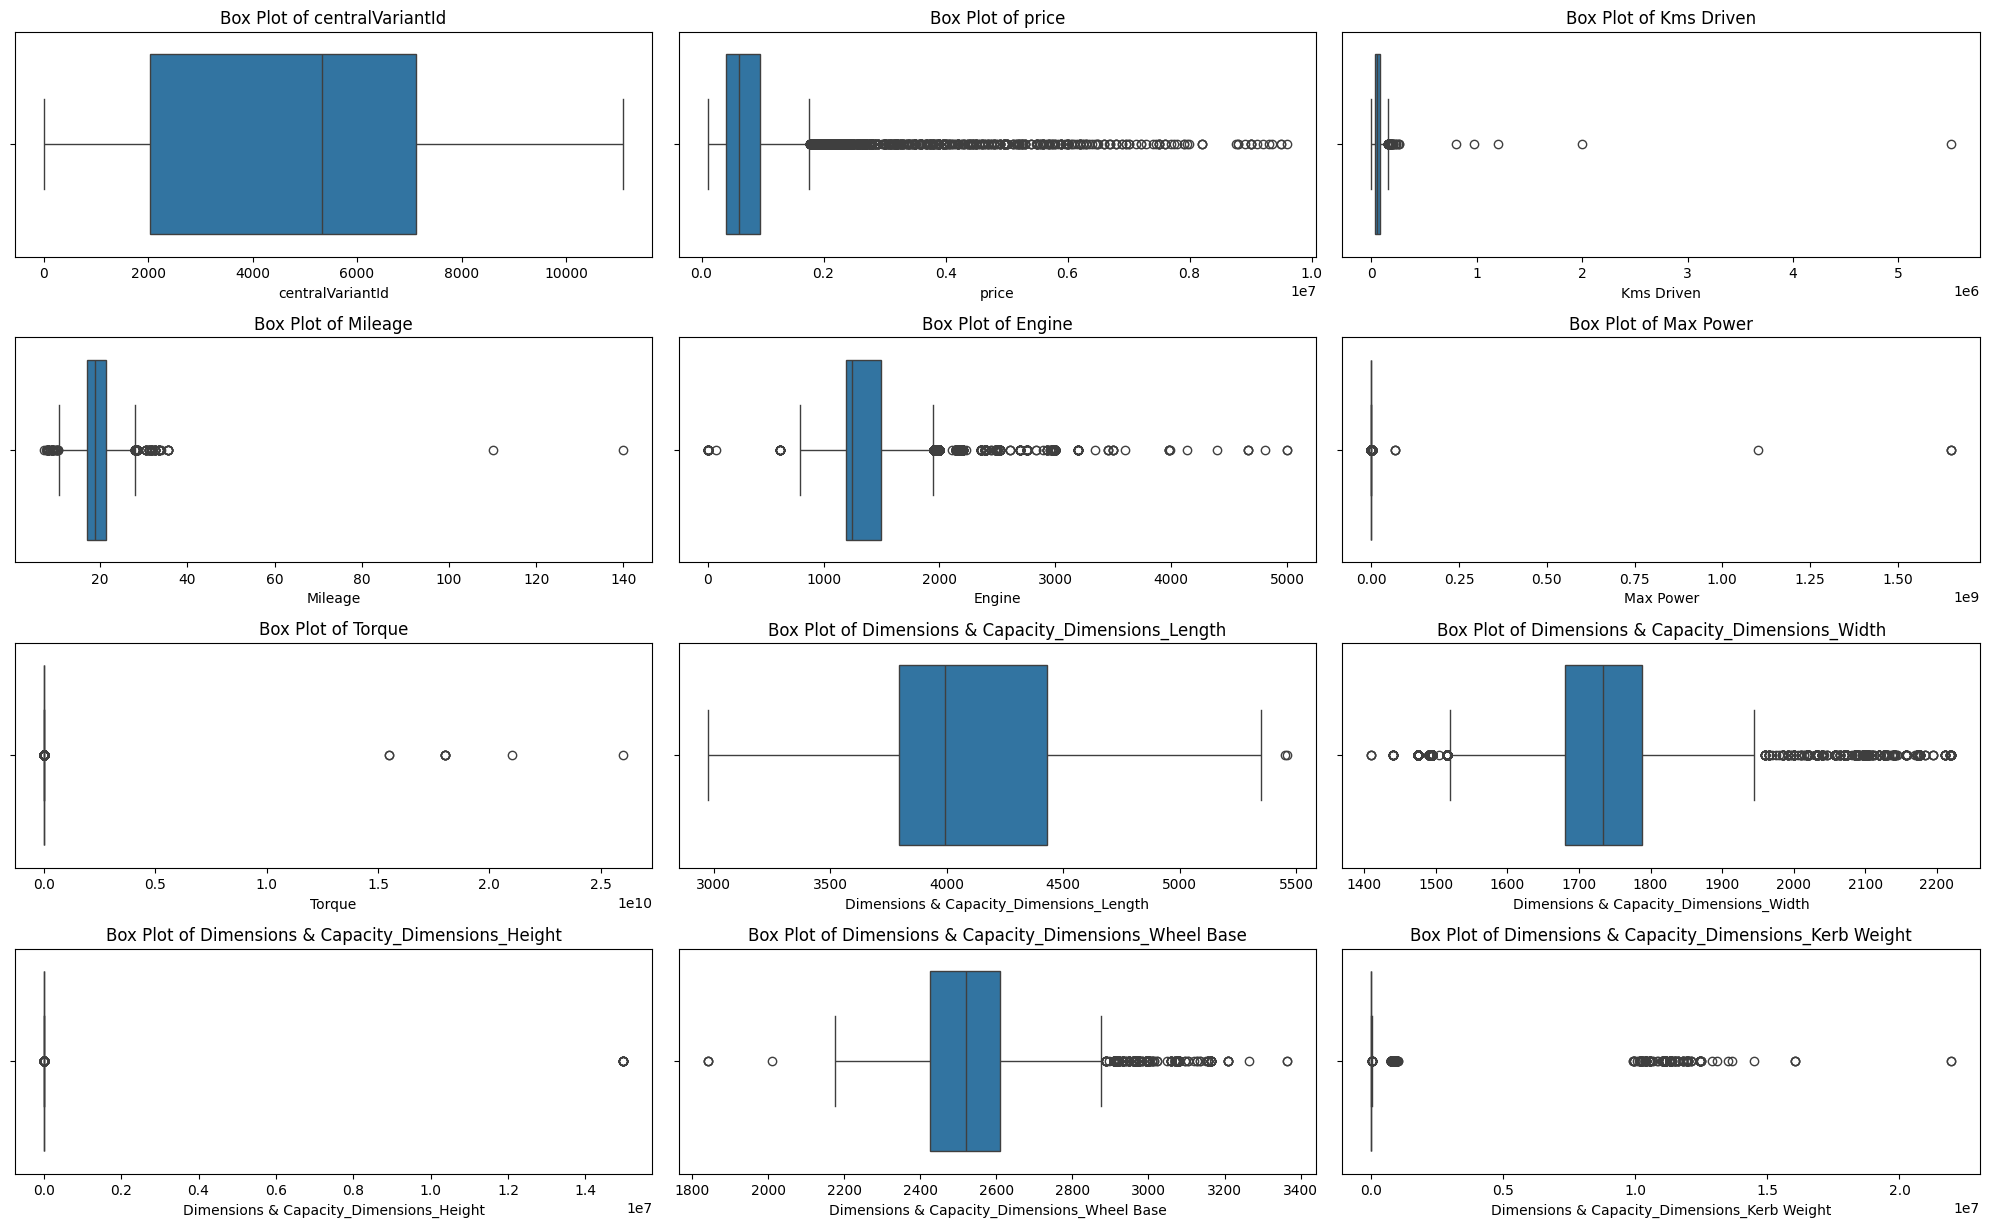

Original DataFrame shape: (8369, 39)
Cleaned DataFrame shape: (6566, 39)


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select numeric columns
numeric_columns = usedcars.select_dtypes(include=['float64', 'int64']).columns

# Function to filter out columns with single-digit majority values
def filter_columns_with_single_digit_majority(usedcars, columns):
    filtered_columns = []
    for column in columns:
        if column == 'Year of Manufacture':
            continue
        if pd.api.types.is_numeric_dtype(usedcars[column]):
            # Check if the majority of the values are single digits
            num_single_digit_values = (usedcars[column] < 10).sum()
            total_values = usedcars[column].notna().sum()
            if num_single_digit_values / total_values <= 0.5:  # Less than or equal to 50% single-digit values
                filtered_columns.append(column)
    return filtered_columns

# Function to visualize outliers using box plots
def visualize_outliers(usedcars, columns):
    plt.figure(figsize=(20, 15))  # Adjust figure size as needed
    for i, column in enumerate(columns, 1):
        plt.subplot(len(columns)//3 + 1, 3, i)  # Adjust subplot layout as needed
        sns.boxplot(x=usedcars[column])
        plt.title(f'Box Plot of {column}')
        plt.tight_layout()
    plt.show()

# Function to remove only extreme outliers using a higher IQR threshold
def remove_extreme_outliers_iqr(usedcars, columns):
    for column in columns:
        if pd.api.types.is_numeric_dtype(usedcars[column]):
            Q1 = usedcars[column].quantile(0.25)
            Q3 = usedcars[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 3.0 * IQR  # Higher threshold for extreme outliers
            upper_bound = Q3 + 3.0 * IQR  # Higher threshold for extreme outliers
            usedcars = usedcars[(usedcars[column] >= lower_bound) & (usedcars[column] <= upper_bound)]
    return usedcars

# Filter columns to exclude those with single-digit majority values and 'Year of Manufacture'
filtered_columns = filter_columns_with_single_digit_majority(usedcars, numeric_columns)

# Visualize outliers in filtered numeric columns
visualize_outliers(usedcars, filtered_columns)

# Remove only extreme outliers from the dataframe using a higher IQR threshold
extreme_outliers_cleaned_usedcars = remove_extreme_outliers_iqr(usedcars, filtered_columns)

# Display shapes
print(f"Original DataFrame shape: {usedcars.shape}")
print(f"Cleaned DataFrame shape: {extreme_outliers_cleaned_usedcars.shape}")

# Save the cleaned DataFrame to a CSV file
extreme_outliers_cleaned_usedcars.to_csv('outliers_cleaned_usedcars.csv', index=False)


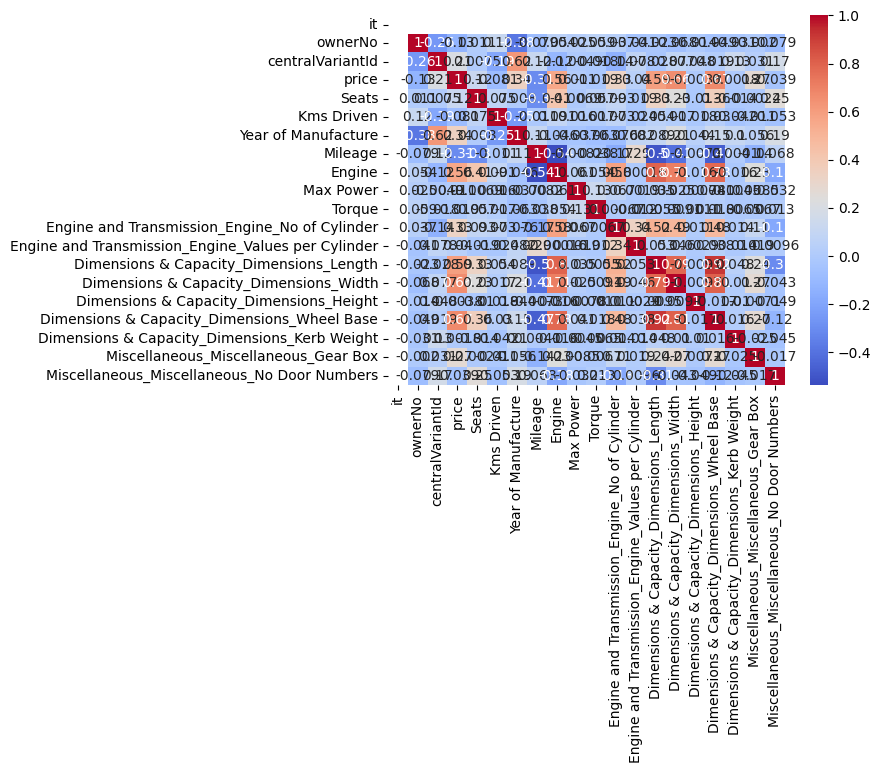

price                                                 1.000000
Dimensions & Capacity_Dimensions_Wheel Base           0.670484
Dimensions & Capacity_Dimensions_Width                0.658714
Dimensions & Capacity_Dimensions_Length               0.593338
Engine                                                0.560877
Year of Manufacture                                   0.343543
Engine and Transmission_Engine_No of Cylinder         0.333714
Miscellaneous_Miscellaneous_Gear Box                  0.271463
centralVariantId                                      0.207496
Seats                                                 0.118955
Engine and Transmission_Engine_Values per Cylinder    0.040030
Max Power                                             0.011229
Dimensions & Capacity_Dimensions_Kerb Weight          0.001787
Dimensions & Capacity_Dimensions_Height              -0.003848
Torque                                               -0.018983
Miscellaneous_Miscellaneous_No Door Numbers          -0

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = usedcars.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Check correlation with price
correlation_with_price = correlation_matrix["price"].sort_values(ascending=False)
print(correlation_with_price)


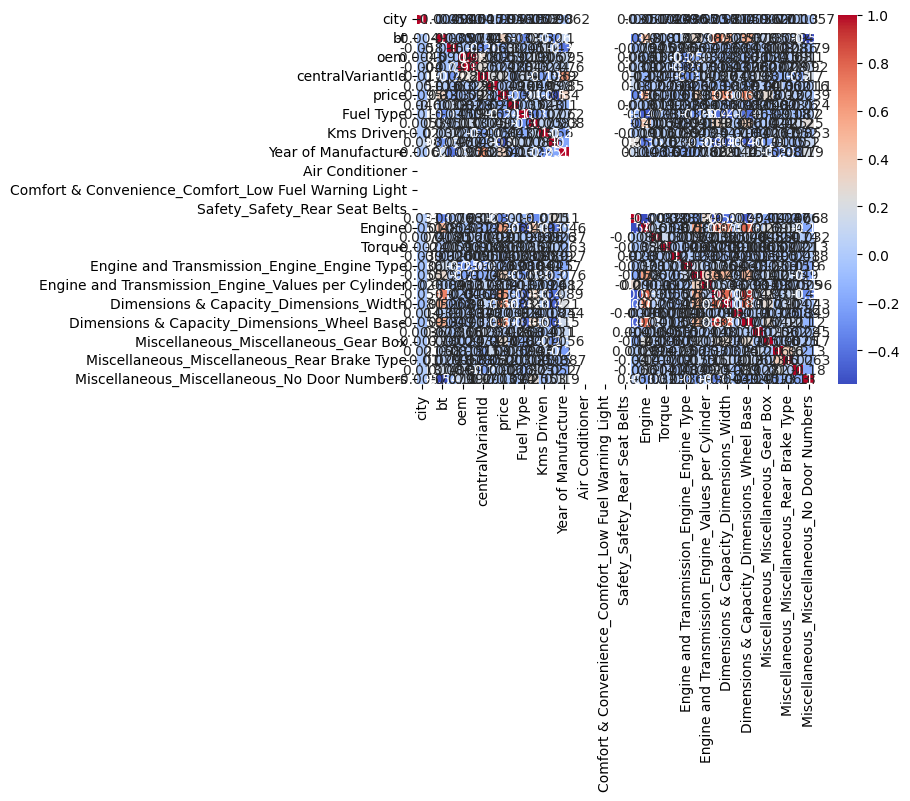

price                                                   1.000000
Dimensions & Capacity_Dimensions_Wheel Base             0.670484
Dimensions & Capacity_Dimensions_Width                  0.658714
Dimensions & Capacity_Dimensions_Length                 0.593338
Engine                                                  0.560877
Year of Manufacture                                     0.343543
Engine and Transmission_Engine_No of Cylinder           0.333714
bt                                                      0.332586
Miscellaneous_Miscellaneous_Gear Box                    0.271463
centralVariantId                                        0.207496
Miscellaneous_Miscellaneous_Rear Brake Type             0.120055
Seats                                                   0.118955
Engine and Transmission_Engine_Values per Cylinder      0.040030
Miscellaneous_Miscellaneous_Tyre Type                   0.020237
Max Power                                               0.011229
Dimensions & Capacity_Dim

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
usedcars_encoded = usedcars.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# Calculate the correlation matrix
correlation_matrix = usedcars_encoded.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Check correlation with price
correlation_with_price = correlation_matrix["price"].sort_values(ascending=False)
print(correlation_with_price)


In [22]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# Fill missing values in the target variable 'price' with the median
y = usedcars["price"].fillna(usedcars["price"].median())

# Automatically select categorical columns with datatype as 'object'
categorical_columns = usedcars.select_dtypes(include=['object']).columns

# Encode categorical variables using Label Encoding
labelencoder = LabelEncoder()
X_encoded = usedcars[categorical_columns].apply(labelencoder.fit_transform)

# Identify and remove constant features (features with only one unique value)
constant_columns = [col for col in X_encoded.columns if X_encoded[col].nunique() == 1]
X_encoded = X_encoded.drop(columns=constant_columns)

# Perform ANOVA test
f_values, p_values = f_classif(X_encoded, y)

# Create a DataFrame for results
anova_results = pd.DataFrame({"Feature": X_encoded.columns, "F-Value": f_values, "P-Value": p_values})

# Sort by P-Value
anova_results = anova_results.sort_values("P-Value")

# Display the results
print(anova_results)

# List constant features that were removed
print("Constant features removed:", constant_columns)


                                         Feature   F-Value        P-Value
7                                   Transmission  4.125362   0.000000e+00
1                                             bt  2.931465  3.817326e-179
11   Miscellaneous_Miscellaneous_Rear Brake Type  2.017913   1.953211e-72
5                             Insurance Validity  1.937740   4.813150e-64
6                                      Fuel Type  1.925663   8.397762e-63
9     Engine and Transmission_Engine_Engine Type  1.476708   2.318097e-22
12         Miscellaneous_Miscellaneous_Tyre Type  1.471965   5.188898e-22
8           Engine and Transmission_Engine_Color  1.384233   6.253883e-16
10  Miscellaneous_Miscellaneous_Front Brake Type  1.368859   6.025499e-15
0                                           city  1.360322   2.065885e-14
2                                            oem  1.110962   5.654251e-03
3                                          model  1.092665   1.655188e-02
4                                    v

Based on your correlation analysis and ANOVA results, here are 15 features that could be selected for machine learning models:

Highly Correlated Features:
Dimensions & Capacity_Dimensions_Wheel Base (0.670484 correlation with price)
Dimensions & Capacity_Dimensions_Width (0.658714 correlation with price)
Dimensions & Capacity_Dimensions_Length (0.593338 correlation with price)
Engine (0.560877 correlation with price)
Year of Manufacture (0.343543 correlation with price)
Engine and Transmission_Engine_No of Cylinder (0.333714 correlation with price)
Miscellaneous_Miscellaneous_Gear Box (0.271463 correlation with price)
ANOVA Test (Based on F-Value and P-Value):
Transmission (High F-Value and significant P-Value)
bt (High F-Value and significant P-Value)
Miscellaneous_Miscellaneous_Rear Brake Type (Significant ANOVA result)
Insurance Validity (Significant ANOVA result)
Fuel Type (Significant ANOVA result)
Engine and Transmission_Engine_Engine Type (Significant ANOVA result)
Miscellaneous_Miscellaneous_Tyre Type (Significant ANOVA result)
Engine and Transmission_Engine_Color (Significant ANOVA result)
These features provide a balance between those strongly correlated with the target variable (price) and those identified as statistically significant by ANOVA tests. You can use these for your machine learning model training.

In [65]:
usedcars.Engine.unique()

array([1197., 1248., 1199., 1497., 1498., 1086., 1462., 1198., 1598.,
       1196., 1461., 1368., 1495., 1591., 1373., 1399., 1396., 1298.,
       1599., 1586., 1493., 1596., 1405., 1499., 1496., 1364., 1061.,
       1799., 1896., 1798., 1172., 1193., 1186., 1796.,  999., 1343.,
       1817.])

In [23]:
usedcars.head()

,city,it,bt,ownerNo,oem,model,centralVariantId,variantName,price,Insurance Validity,Fuel Type,Seats,Kms Driven,Transmission,Year of Manufacture,Power Steering,Air Conditioner,Heater,Comfort & Convenience_Comfort_Low Fuel Warning Light,Interior_Interior_Glove Compartment,Safety_Safety_Rear Seat Belts,Mileage,Engine,Max Power,Torque,Engine and Transmission_Engine_Color,Engine and Transmission_Engine_Engine Type,Engine and Transmission_Engine_No of Cylinder,Engine and Transmission_Engine_Values per Cylinder,Dimensions & Capacity_Dimensions_Length,Dimensions & Capacity_Dimensions_Width,Dimensions & Capacity_Dimensions_Height,Dimensions & Capacity_Dimensions_Wheel Base,Dimensions & Capacity_Dimensions_Kerb Weight,Miscellaneous_Miscellaneous_Gear Box,Miscellaneous_Miscellaneous_Front Brake Type,Miscellaneous_Miscellaneous_Rear Brake Type,Miscellaneous_Miscellaneous_Tyre Type,Miscellaneous_Miscellaneous_No Door Numbers
0,bangalore,0,Hatchback,3,Maruti,Maruti Celerio,3979,VXI,400000.0,Third Party insurance,Petrol,5,120000.0,Manual,2015.0,Power Steering,Air Conditioner,Heater,Low Fuel Warning Light,Glove Compartment,Rear Seat Belts,23.10,998.0,67.04,90.00,White,K10B Engine,3.0,4.0,3715.0,1635.0,1565.0,2425.0,835.0,5.0,Ventilated Disc,Drum,"Tubeless, Radial",5.0
1,bangalore,0,SUV,2,Ford,Ford Ecosport,6087,1.5 Petrol Titanium BSIV,811000.0,Comprehensive,Petrol,5,32706.0,Manual,2018.0,Power Steering,Air Conditioner,Heater,Low Fuel Warning Light,Glove Compartment,Rear Seat Belts,17.00,1497.0,121.31,150.00,White,Ti-VCT Petrol Engine,3.0,4.0,3998.0,1765.0,1647.0,2519.0,1242.0,5.0,Ventilated Disc,Drum,"Tubeless,Radial",4.0
2,bangalore,0,Hatchback,1,Tata,Tata Tiago,2983,1.2 Revotron XZ,585000.0,Comprehensive,Petrol,5,11949.0,Manual,2018.0,Power Steering,Air Conditioner,Heater,Low Fuel Warning Light,Glove Compartment,Rear Seat Belts,23.84,1199.0,84.00,114.00,Red,Revotron Engine,3.0,4.0,3746.0,1647.0,1535.0,2400.0,1012.0,5.0,Disc,Drum,Tubeless,5.0
3,bangalore,0,Sedan,1,Hyundai,Hyundai Xcent,1867,1.2 Kappa S Option,462000.0,Comprehensive,Petrol,5,17794.0,Manual,2014.0,Power Steering,Air Conditioner,Heater,Low Fuel Warning Light,Glove Compartment,Rear Seat Belts,19.10,1197.0,81.86,113.75,Others,Kappa VTVT Petrol Engine,4.0,4.0,3995.0,1660.0,1520.0,2425.0,1180.0,5.0,Disc,Drum,"Tubeless,Radial",4.0
4,bangalore,0,SUV,1,Maruti,Maruti SX4 S Cross,4277,DDiS 200 Zeta,790000.0,Third Party insurance,Diesel,5,60000.0,Manual,2015.0,Power Steering,Air Conditioner,Heater,Low Fuel Warning Light,Glove Compartment,Rear Seat Belts,23.65,1248.0,88.50,200.00,Gray,DDiS 200 Diesel Engine,4.0,4.0,4300.0,1785.0,1595.0,2600.0,1230.0,5.0,Ventilated Disc,Solid Disc,"Tubeless,Radial",5.0


In [24]:
usedcars.to_csv('newcleaned_usedcars.csv', index=False)

In [66]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect and remove outliers in numerical features
for feature in numerical_features:
    outliers = detect_outliers_iqr(usedcars, feature)
    usedcars = usedcars.drop(outliers.index)
